# Checking the structure of the grid in each case

In [32]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from xgcm import Grid
import cmocean as cm

In [3]:
db = '/g/data/x77/amh157/anu-tub/diagnostics/anu-tub.db'

In [4]:
session=cc.database.create_session(db)

In [12]:
experiments=['anu-tub-n3','anu-tub-hycom1','anu-tub-adapt','anu-tub-sig-sym']

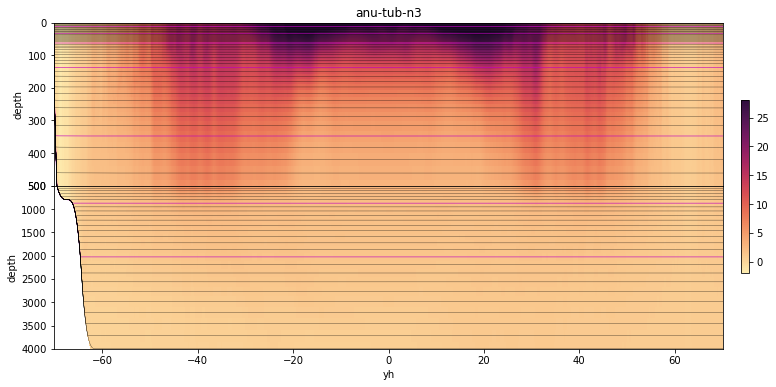

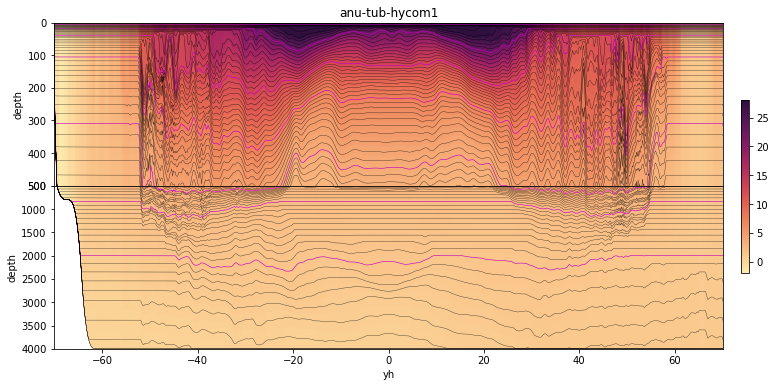

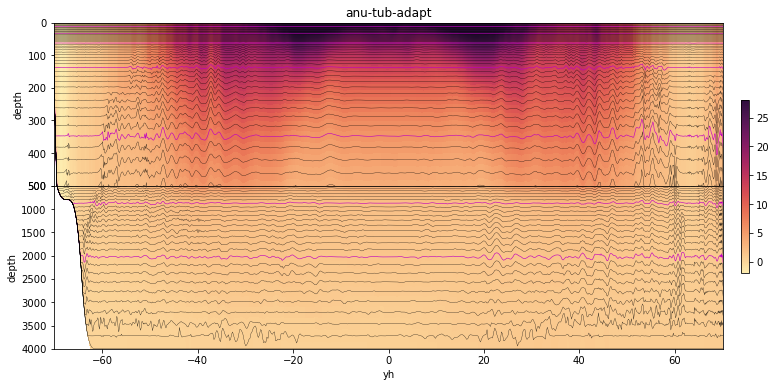

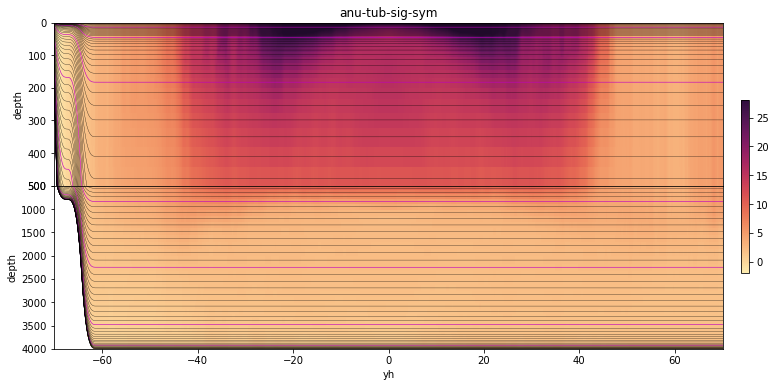

In [34]:
for experiment in experiments:
    plt.figure(figsize=(12,6))
    
    darray = cc.querying.getvar(experiment, 'thkcello', session,ncfile='ocean_month.nc',n=-1).isel(time=-1)
    depth = darray.isel(xh=40).cumsum('zl').values
    darray = cc.querying.getvar(experiment, 'thetao', session,ncfile='ocean_month.nc',n=-1).isel(time=-1)
    
    theta = xr.DataArray(data=darray.isel(xh=40).values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], darray.yh.values),depth=(["zl", "yh"], depth)),
            attrs= darray.attrs)
    
    plt.subplot(211)
    p1 = theta.plot(y = "depth",vmin=-2,vmax=28,cmap=cm.cm.matter,add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(darray.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(darray.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([0,500])
    plt.gca().invert_yaxis()
    plt.title(experiment)
    
    plt.subplot(212)
    p1 = theta.plot(y = "depth",vmin=-2,vmax=28,cmap=cm.cm.matter,add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(darray.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(darray.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([500,4000])
    plt.gca().invert_yaxis()
    
    plt.subplots_adjust(hspace=0)
    
    ax_c = plt.axes([0.92,0.3,0.01,0.4])
    plt.colorbar(p1,ax_c)

## Summary:
* Sigma models look as expected
* Hycom1 case looks OK at midlatitudes but we have z levels to the bottom at high latitudes
* Adaptive not really following density layers -- is restoring too strong?? 

In [43]:
dyt = cc.querying.getvar(experiment, 'dyt', session,ncfile='ocean_static.nc',n=-1).load()
dxt = cc.querying.getvar(experiment, 'dxt', session,ncfile='ocean_static.nc',n=-1).load()

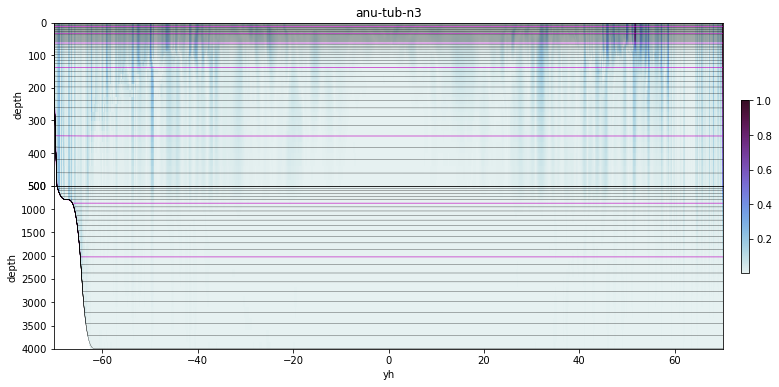

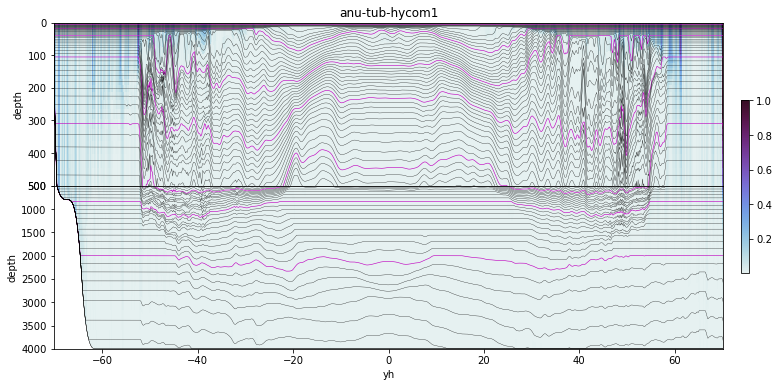

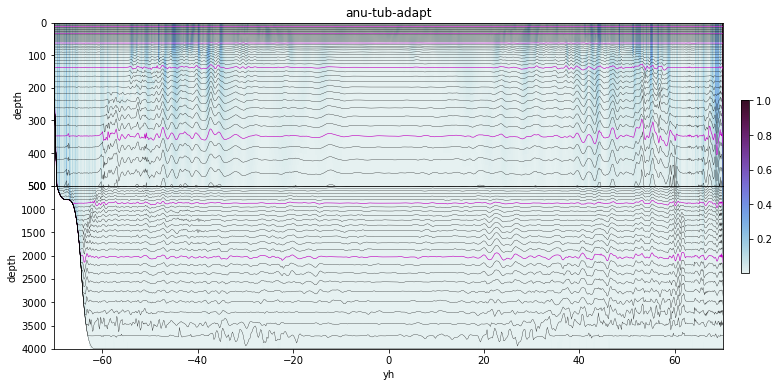

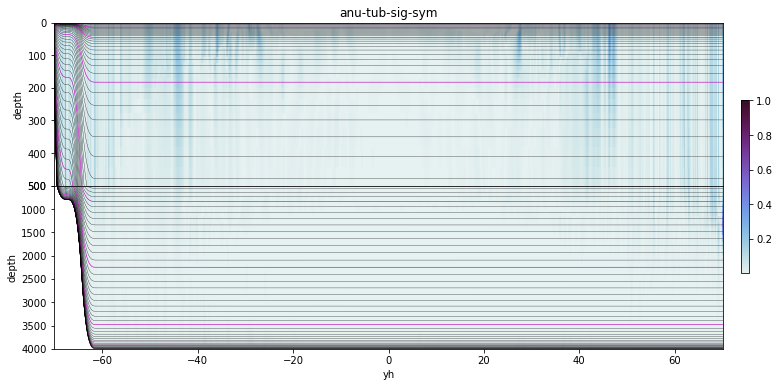

In [47]:
for experiment in experiments:
    plt.figure(figsize=(12,6))
    
    darray = cc.querying.getvar(experiment, 'thkcello', session,ncfile='ocean_month.nc',n=-1).isel(time=-1)
    depth = darray.isel(xh=40).cumsum('zl').values
    thetao = cc.querying.getvar(experiment, 'thetao', session,ncfile='ocean_month.nc',n=-1).isel(time=-1).load()
    
    grad_t = 1e3*((thetao.differentiate('yh')/dyt)**2 + (thetao.differentiate('xh')/dxt)**2 )**(0.5)
    
    grad_theta = xr.DataArray(data=grad_t.isel(xh=40).values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], darray.yh.values),depth=(["zl", "yh"], depth)),
            attrs= darray.attrs)
    
    plt.subplot(211)
    p1 = grad_theta.plot(y = "depth",vmax=1,cmap=cm.cm.dense,add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(darray.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(darray.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([0,500])
    plt.gca().invert_yaxis()
    plt.title(experiment)
    
    plt.subplot(212)
    p1 = grad_theta.plot(y = "depth",vmax=1,cmap=cm.cm.dense,add_colorbar=False)
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(darray.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(darray.yh.values,depth[ii,:],'k',linewidth=0.3)
    plt.ylim([500,4000])
    plt.gca().invert_yaxis()
    
    plt.subplots_adjust(hspace=0)
    
    ax_c = plt.axes([0.92,0.3,0.01,0.4])
    plt.colorbar(p1,ax_c)

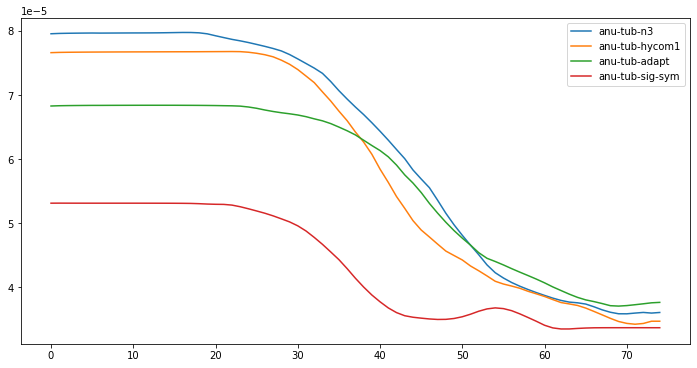

In [53]:
plt.figure(figsize=(12,6))

for experiment in experiments:
    
    darray = cc.querying.getvar(experiment, 'thkcello', session,ncfile='ocean_month.nc',n=-1).isel(time=-1)
    depth = darray.isel(xh=40).cumsum('zl').values
    thetao = cc.querying.getvar(experiment, 'thetao', session,ncfile='ocean_month.nc',n=-1).isel(time=-1).load()
    
    grad_t = ((thetao.differentiate('yh')/dyt)**2 + (thetao.differentiate('xh')/dxt)**2 )**(0.5)
    
    mean_gradient = grad_t.sel(yh=slice(-70,-50)).mean(['xh','yh'])
    
    plt.plot(mean_gradient.values,label=experiment)
    
plt.legend()